# Exploratory Data Analysis (EDA) – Cryptocurrency Volatility Project

This notebook analyzes the cleaned cryptocurrency dataset1 to understand historical prices, market behavior, volatility patterns, and correlations across assets.


Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set(rc={"figure.figsize": (12, 6)})

df = pd.read_csv("../data/cleaned_crypto.csv", parse_dates=["date"])
df.head()


,date,open,high,low,close,volume,market_cap,timestamp,symbol
0,2019-06-21,3.278668,3.280179,2.391997,3.201412,1.334888e+08,0.0,2019-06-21T23:59:59.999Z,Algorand
1,2019-06-22,3.153618,3.155807,1.876100,2.158967,2.236034e+08,0.0,2019-06-22T23:59:59.999Z,Algorand
2,2019-06-23,2.160110,2.201109,1.776865,1.890702,1.772907e+08,0.0,2019-06-23T23:59:59.999Z,Algorand
3,2019-06-24,1.890702,1.984108,1.302322,1.383728,1.841176e+08,0.0,2019-06-24T23:59:59.999Z,Algorand
4,2019-06-25,1.374857,1.825113,1.314638,1.537290,2.776654e+08,0.0,2019-06-25T23:59:59.999Z,Algorand


## 1. Dataset Overview

We load the cleaned dataset and preview the first few rows.


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72777 entries, 0 to 72776
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        72777 non-null  datetime64[ns]
 1   open        72777 non-null  float64       
 2   high        72777 non-null  float64       
 3   low         72777 non-null  float64       
 4   close       72777 non-null  float64       
 5   volume      72777 non-null  float64       
 6   market_cap  72777 non-null  float64       
 7   timestamp   64543 non-null  object        
 8   symbol      72777 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 5.0+ MB


## 2. Summary Statistics

We examine the distributions of numerical variables such as prices, volume, and market capitalization.


In [4]:
df.describe()


,date,open,high,low,close,volume,market_cap
count,72777,72777.000000,72777.000000,72777.000000,72777.000000,7.277700e+04,7.277700e+04
mean,2019-11-18 12:32:05.025763584,1031.607025,1061.019225,1002.128232,1032.705256,2.566487e+09,1.761356e+10
min,2013-05-05 00:00:00,0.000055,0.000062,0.000053,0.000058,0.000000e+00,0.000000e+00
25%,2018-09-19 00:00:00,0.155405,0.164506,0.147913,0.155901,1.046130e+07,2.135630e+08
50%,2020-04-03 00:00:00,1.142745,1.194004,1.088085,1.142759,1.262314e+08,1.460534e+09
75%,2021-07-14 00:00:00,17.410197,18.108484,16.580003,17.411800,7.733740e+08,5.685806e+09
max,2022-10-23 00:00:00,67549.735581,162188.255437,66458.723733,67566.830088,3.509679e+11,1.274831e+12
std,NaN,5789.370291,5965.811481,5625.471440,5791.871999,1.043860e+10,8.332075e+10


## 3. Data Availability per Cryptocurrency

This helps identify which assets have long or short histories in the dataset.


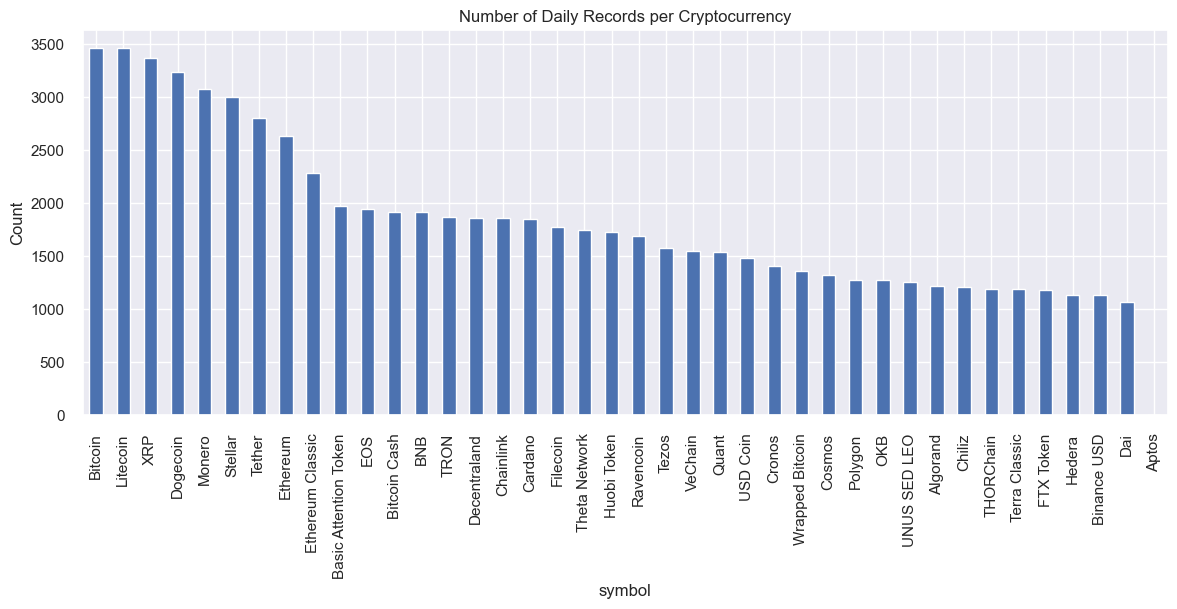

In [5]:
df["symbol"].value_counts().plot(kind="bar", figsize=(14,5))
plt.title("Number of Daily Records per Cryptocurrency")
plt.ylabel("Count")
plt.show()


## 4. Price Trends Over Time

We visualize price evolution for major cryptocurrencies.


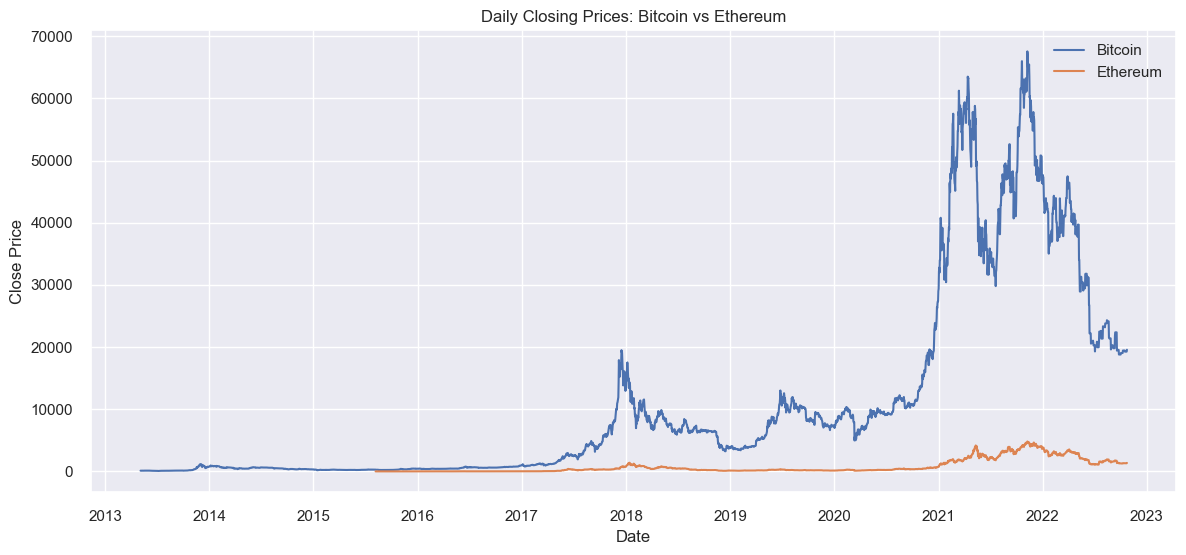

In [6]:
symbols_to_plot = ["Bitcoin", "Ethereum"]

plt.figure(figsize=(14,6))
for sym in symbols_to_plot:
    sub = df[df["symbol"] == sym]
    plt.plot(sub["date"], sub["close"], label=sym)

plt.title("Daily Closing Prices: Bitcoin vs Ethereum")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


## 5. Distribution of Closing Prices

Cryptocurrency markets usually have skewed price distributions.


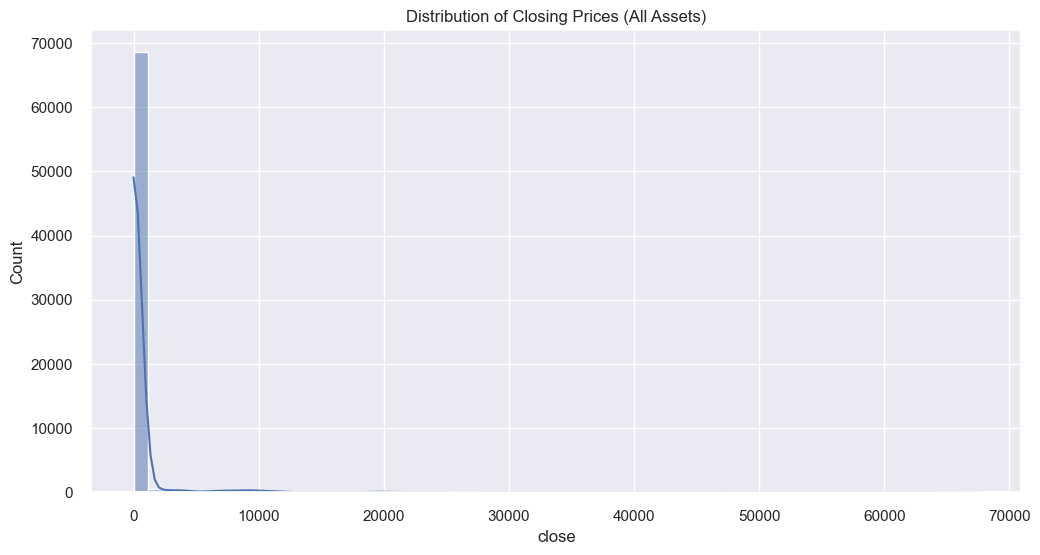

In [7]:
sns.histplot(df["close"], kde=True, bins=60)
plt.title("Distribution of Closing Prices (All Assets)")
plt.show()


## 6. Daily Returns & Volatility

We compute daily percentage returns to study volatility behavior.


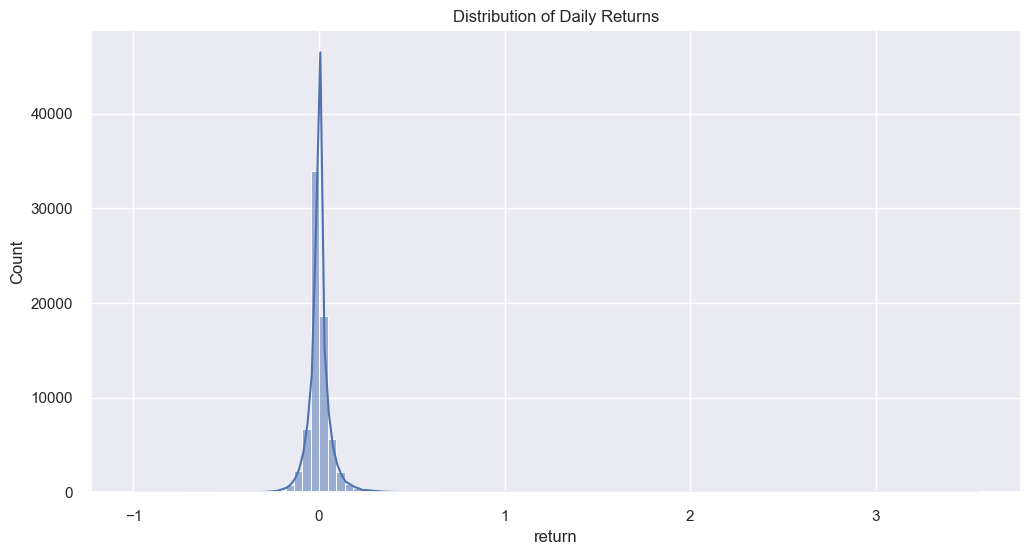

In [8]:
df["return"] = df.groupby("symbol")["close"].pct_change()

sns.histplot(df["return"].dropna(), kde=True, bins=100)
plt.title("Distribution of Daily Returns")
plt.show()


## 7. Rolling Volatility Example

A 30-day rolling standard deviation shows changing volatility levels.


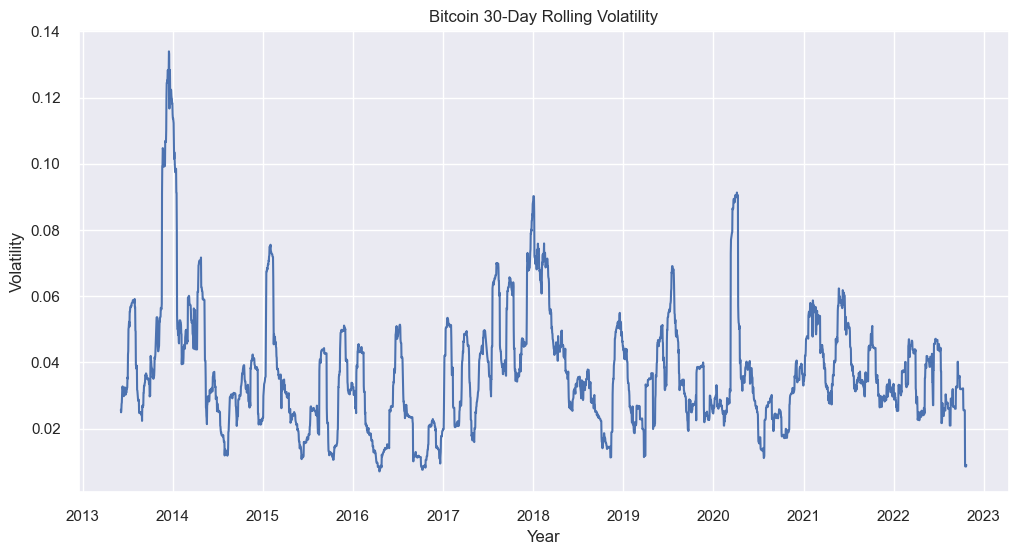

In [10]:
btc = df[df["symbol"] == "Bitcoin"].sort_values("date")
btc["vol_30"] = btc["return"].rolling(30).std()

plt.plot(btc["date"], btc["vol_30"])
plt.title("Bitcoin 30-Day Rolling Volatility")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.show()


## 8. Correlation Between Cryptocurrencies

We examine how returns across cryptocurrencies move together.


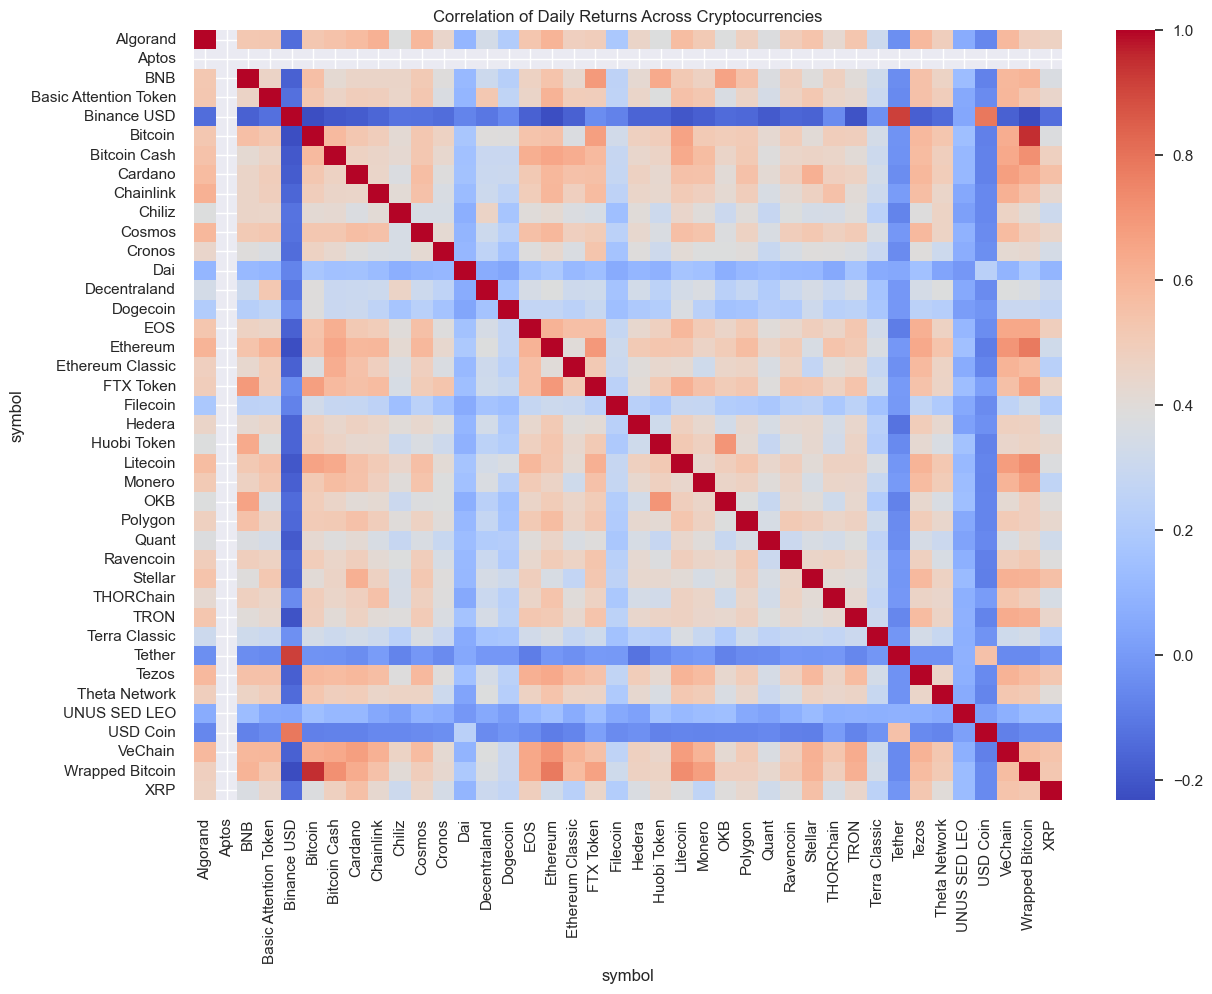

In [11]:
pivot_df = df.pivot(index="date", columns="symbol", values="close")
returns = pivot_df.pct_change()

corr = returns.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation of Daily Returns Across Cryptocurrencies")
plt.show()


## 9. Key Insights from EDA

- Bitcoin and Ethereum have the longest historical coverage.
- Price distributions are highly skewed, with strong right tails.
- Daily returns exhibit fat-tailed behavior, indicating high volatility.
- Bitcoin and Ethereum show strong correlation; altcoins vary.
- Volatility clusters appear during major market events.

This dataset is now ready for feature engineering and model training.


In [12]:
df.describe(include="all")


,date,open,high,low,close,volume,market_cap,timestamp,symbol,return
count,72777,72777.000000,72777.000000,72777.000000,72777.000000,7.277700e+04,7.277700e+04,64543,72777,72737.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3248,40,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-23T23:59:59.999Z,Bitcoin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,3459,NaN
mean,2019-11-18 12:32:05.025763584,1031.607025,1061.019225,1002.128232,1032.705256,2.566487e+09,1.761356e+10,NaN,NaN,0.003476
min,2013-05-05 00:00:00,0.000055,0.000062,0.000053,0.000058,0.000000e+00,0.000000e+00,NaN,NaN,-0.999800
25%,2018-09-19 00:00:00,0.155405,0.164506,0.147913,0.155901,1.046130e+07,2.135630e+08,NaN,NaN,-0.019404
50%,2020-04-03 00:00:00,1.142745,1.194004,1.088085,1.142759,1.262314e+08,1.460534e+09,NaN,NaN,0.000000
75%,2021-07-14 00:00:00,17.410197,18.108484,16.580003,17.411800,7.733740e+08,5.685806e+09,NaN,NaN,0.020223
max,2022-10-23 00:00:00,67549.735581,162188.255437,66458.723733,67566.830088,3.509679e+11,1.274831e+12,NaN,NaN,3.555712
